IMPORTAZIONE LIBRERIE

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [23]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


PATH PER ANALISI SUL VOLO M1 NO FAULT

In [24]:
path_cartella_NoFaultM1 = r"\M1\NO_FAULT1"

path_NoFaultM1 = path_file + path_cartella_NoFaultM1

print(path_NoFaultM1)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\M1\NO_FAULT1


In [26]:
att = pd.read_csv(path_NoFaultM1+"\ATT.csv")
att = att.drop(['ErrRP', 'ErrYaw', 'AEKF'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
print(att)

      LineNo    TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0        188  15037193      0.0 -0.08       0.0  -0.60   17.24  11.69
1        291  15071127      0.0 -0.08       0.0  -0.60   23.31  11.71
2        633  15133024      0.0 -0.07       0.0  -0.60   31.41  11.73
3        746  15149226      0.0 -0.07       0.0  -0.60   33.44  11.74
4        859  15164706      0.0 -0.07       0.0  -0.60   35.46  11.74
...      ...       ...      ...   ...       ...    ...     ...    ...
6729  301652  87102709      0.0  1.49       0.0   1.36    2.88   2.86
6730  301696  87113111      0.0  1.51       0.0   1.35    2.89   2.87
6731  301741  87123756      0.0  1.53       0.0   1.35    2.90   2.88
6732  301789  87136641      0.0  1.56       0.0   1.35    2.91   2.89
6733  301833  87147394      0.0  1.57       0.0   1.35    2.91   2.89

[6734 rows x 8 columns]


In [27]:
ctun = pd.read_csv(path_NoFaultM1+"\CTUN.csv")
ctun = ctun.drop(['ThI', 'ABst', 'ThO', 'ThH', 'DAlt', 'BAlt', 'DSAlt', 'SAlt', 'TAlt', 'DCRt', 'CRt'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
print(ctun)

     LineNo    TimeUS       Alt
0      1911  15489852 -0.090936
1      2324  15590264  0.058386
2      2738  15691546  0.166297
3      3152  15792092  0.249089
4      3531  15893068  0.315913
..      ...       ...       ...
681  299665  86646556  0.001581
682  300113  86750662  0.003942
683  300566  86851725  0.004179
684  301015  86958026  0.004310
685  301467  87060691  0.002020

[686 rows x 3 columns]


PATH PER ANALISI SUL VOLO M1 FAULT 5%

In [29]:
path_cartella_FaultM1_5 = r"\M1\FAULT_M1_5"

path_FaultM1_5 = path_file + path_cartella_FaultM1_5

print(path_FaultM1_5)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\M1\FAULT_M1_5


In [30]:
att_M1_5 = pd.read_csv(path_FaultM1_5+"\ATT.csv")
att_M1_5 = att_M1_5.drop(['ErrRP', 'ErrYaw', 'AEKF'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
print(att_M1_5)

       LineNo     TimeUS  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw
0         296   19491757     0.00   1.99       0.0   1.11   24.51   24.49
1         640   19557820     0.00   2.00       0.0   1.11   24.54   24.51
2         867   19603142     0.00   1.99       0.0   1.11   24.56   24.53
3        1209   19764173     0.00   1.99       0.0   1.11   24.61   24.58
4        1485   19834986     0.00   1.99       0.0   1.11   24.63   24.61
...       ...        ...      ...    ...       ...    ...     ...     ...
16589  729686  303339533     0.01  47.85       0.0  -9.05  291.45  290.94
16590  729731  303349822     0.01  47.70       0.0  -8.94  291.63  291.13
16591  729776  303360448     0.01  47.53       0.0  -8.83  291.81  291.31
16592  729820  303370367     0.01  47.37       0.0  -8.72  291.96  291.46
16593  729864  303380776     0.01  47.22       0.0  -8.62  292.10  291.59

[16594 rows x 8 columns]


In [37]:
#mergedStuff = pd.merge(att, att_M1_5, on=['TimeUS'], how='inner')
#print(mergedStuff)
att['TimeUS'].isin(att_M1_5['TimeUS']).value_counts()
#att_M1_5 = np.where((att_M1_5['TimeUS'] == att['TimeUS']))

False    6734
Name: TimeUS, dtype: int64

ValueError: x and y must have same first dimension, but have shapes (6734,) and (16594,)

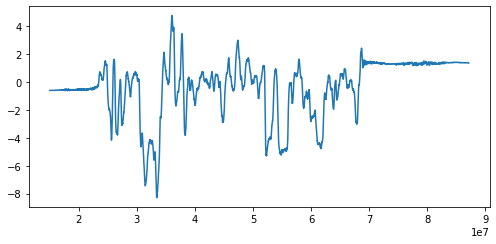

In [31]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
xs = att.TimeUS
ys = [att.Pitch, att_M1_5.Pitch]
for y in ys:
    plt.plot(xs, y)

plt.legend(ys, labels = ['Pitch_NoFault', 'Pitch_Fault_5'])

plt.show()


#plt.plot(att.TimeUS, [att.Pitch, att.DesPitch])

In [12]:
print(att.dtypes)

LineNo        int64
TimeUS        int64
DesRoll     float64
Roll        float64
DesPitch    float64
Pitch       float64
DesYaw      float64
Yaw         float64
dtype: object
